In [1]:
import sys
!{sys.executable} -m pip install fundamentalanalysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import yfinance as yf
import fundamentalanalysis as fa

# installing additional package for desriptive statistics in html format
!pip install ydata_profiling

import ydata_profiling as ypr
from ydata_profiling import ProfileReport
from IPython.display import IFrame

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.stattools import adfuller

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.9/352.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 88.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ba0b0619e803be52af2a5f7c1ee7cc1482bb6f3d65e301029dc008b1c44710c0
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    

## Multicollinearity

### Demonstration

For our demonstration, we will use the fundamentalanalysis library from by JerBouma. We will extract financial statements and compute the ratios for a few of the line items. The ratios that we are going to take into account are quick ratio and current ratio

In [3]:
# API KEY

api_key = "c86bfa9376e4c574e4228028e6e9ad4f"


# Company Ticker
ticker = "SNEX"

 # Collect general company information
profile_cs = fa.profile(ticker, api_key)


# Collect the Balance Sheet statements
balance_sheet_quarter_cs = fa.balance_sheet_statement(ticker, api_key, period="quarter")

balance_sheet_columns = balance_sheet_quarter_cs.columns

balance_sheet_quarter_cs.index.name = 'lineitem'

df = balance_sheet_quarter_cs.T

# We are only going to do this analysis for the period March 2017(included) to December 2022(included)
filtered_df = df.iloc[1:25]
filtered_df =  filtered_df[["totalCurrentAssets", "totalCurrentLiabilities", "cashAndCashEquivalents"]]
filtered_df["current_ratio"] = filtered_df["totalCurrentAssets"] / filtered_df["totalCurrentLiabilities"]
filtered_df["quick_ratio"] = filtered_df["cashAndCashEquivalents"] / filtered_df["totalCurrentLiabilities"]

filtered_df = filtered_df.apply(pd.to_numeric)

vif = pd.DataFrame()
vif["features"] = filtered_df.columns
vif["vif_Factor"] = [variance_inflation_factor(filtered_df.values, i) for i in range(len(filtered_df.columns))]
print(vif)

                  features  vif_Factor
0       totalCurrentAssets  216.269876
1  totalCurrentLiabilities   83.357819
2   cashAndCashEquivalents  176.150203
3            current_ratio   52.095059
4              quick_ratio   69.683160


VIF Factor is greater than 5.

In [4]:
filtered_df.head()

lineitem,totalCurrentAssets,totalCurrentLiabilities,cashAndCashEquivalents,current_ratio,quick_ratio
2022-12,11693900000,11041800000,1252100000,1.059057,0.113396
2022-09,12303100000,11452700000,1108500000,1.074253,0.096789
2022-06,14089800000,11448000000,1363700000,1.230765,0.119121
2022-03,14495300000,10852800000,1299700000,1.335628,0.119757
2021-12,12316600000,8697900000,983400000,1.416043,0.113062


In [5]:
fundamental_data = filtered_df

profile = ProfileReport(fundamental_data)
profile.to_file('fundamental_data.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Diagrams

In [6]:
profile

In [7]:
test_fa_data = fundamental_data
test_fa_data.index = pd.to_datetime(test_fa_data.index)

test_fa_data.head()

lineitem,totalCurrentAssets,totalCurrentLiabilities,cashAndCashEquivalents,current_ratio,quick_ratio
2022-12-01,11693900000,11041800000,1252100000,1.059057,0.113396
2022-09-01,12303100000,11452700000,1108500000,1.074253,0.096789
2022-06-01,14089800000,11448000000,1363700000,1.230765,0.119121
2022-03-01,14495300000,10852800000,1299700000,1.335628,0.119757
2021-12-01,12316600000,8697900000,983400000,1.416043,0.113062


<Axes: >

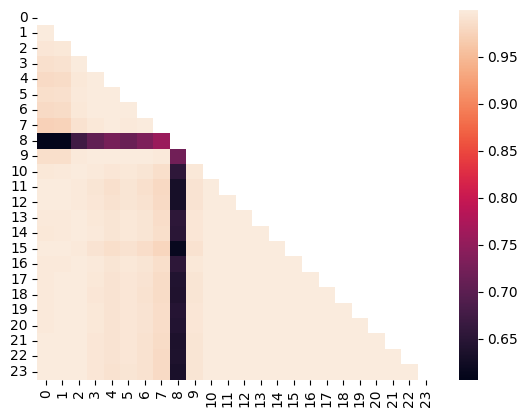

In [8]:


# Compute the correlation matrix
corr = np.corrcoef(test_fa_data.reset_index(drop=True))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create the heatmap
sns.heatmap(corr, mask=mask)

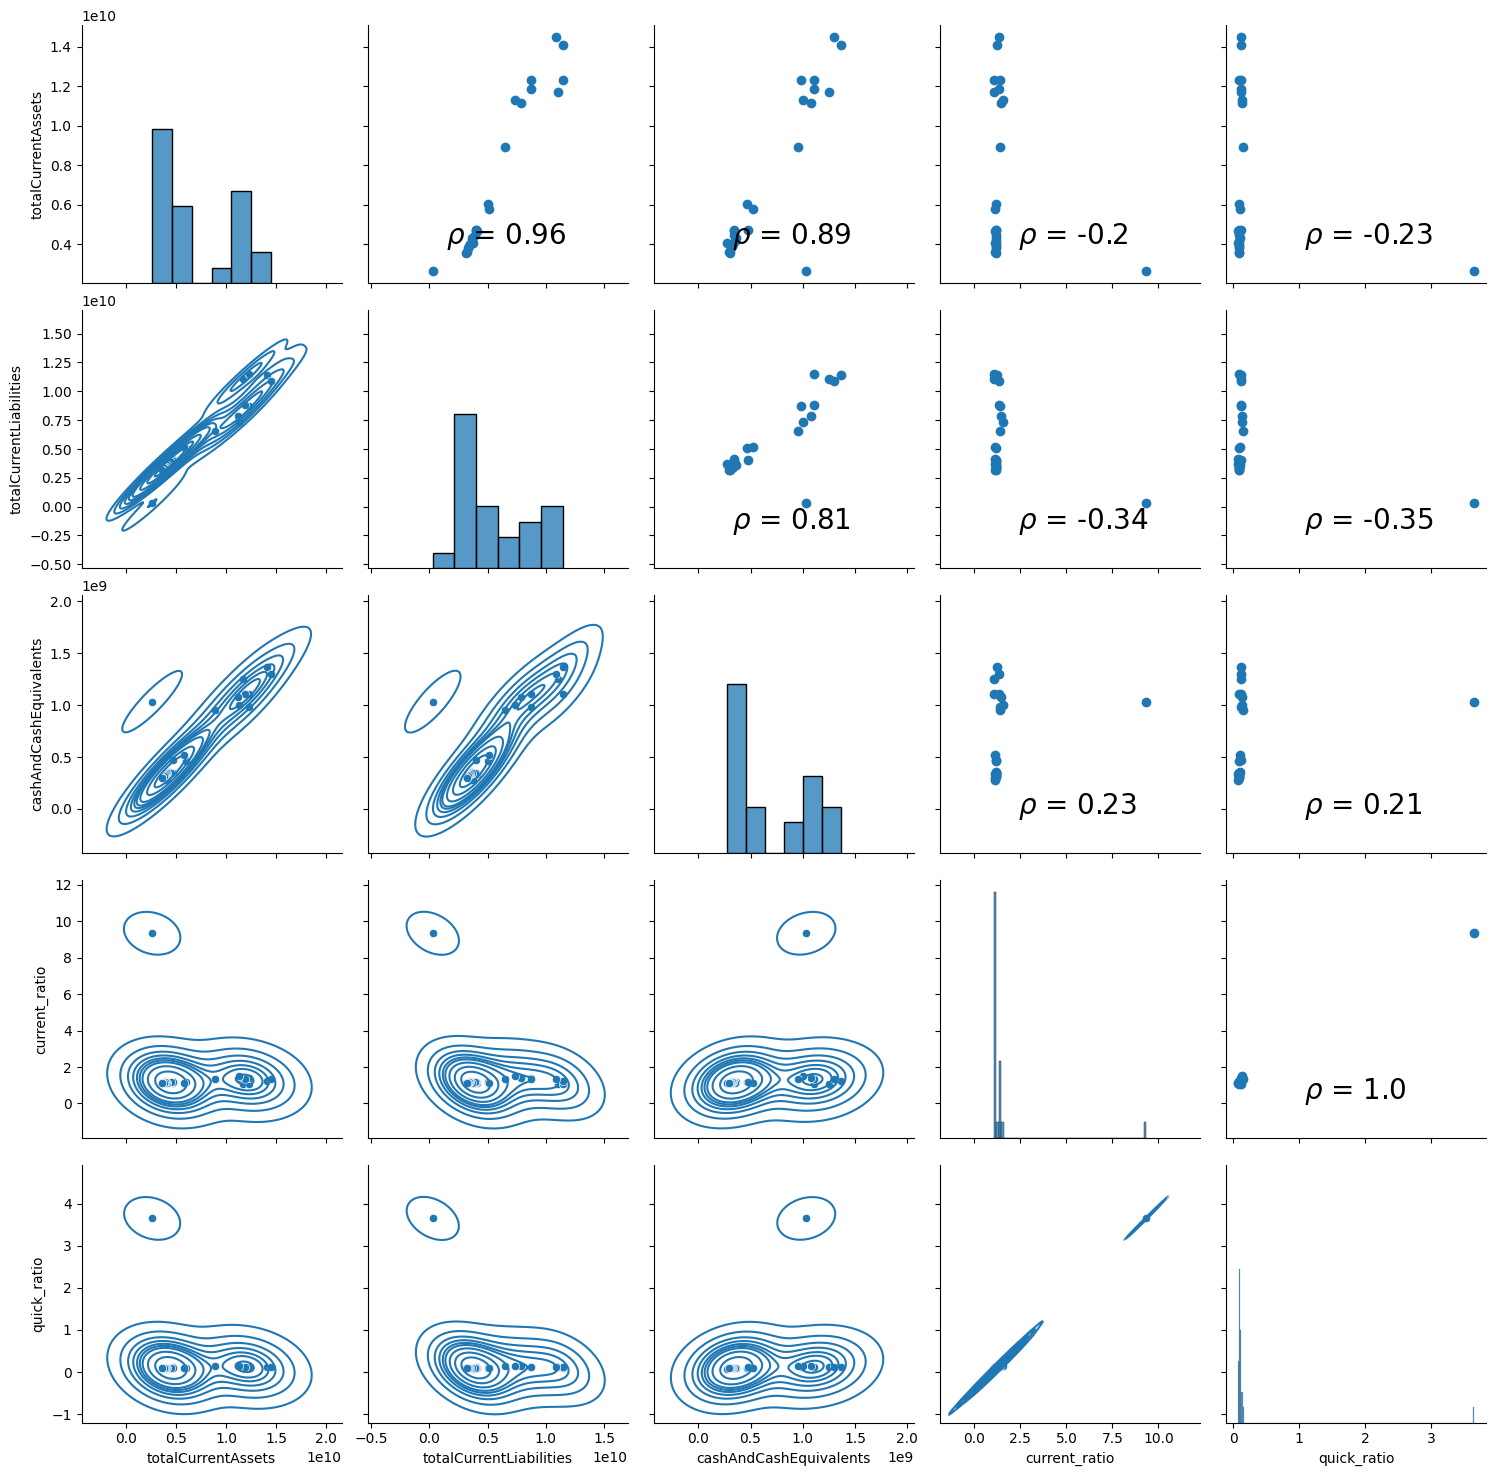

In [9]:
# Function to calculate correlation coefficient between two arrays


def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r"$\rho$ = " + str(round(coef, 2))

    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy=(0.3, 0.15), size=20, xycoords=ax.transAxes)

# Create the default pairplot
grid = sns.pairplot(
    test_fa_data.reset_index(drop=True),
    height=3
)

# Map a scatter plot and Pearson correlation coefficient to the upper triangle
grid = grid.map_upper(plt.scatter)
grid = grid.map_upper(corr)

# Map a histogram to the diagonal
# grid = grid.map_diag(plt.hist)

# Map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot)

In [10]:
test_fa_data.columns

Index(['totalCurrentAssets', 'totalCurrentLiabilities',
       'cashAndCashEquivalents', 'current_ratio', 'quick_ratio'],
      dtype='object', name='lineitem')

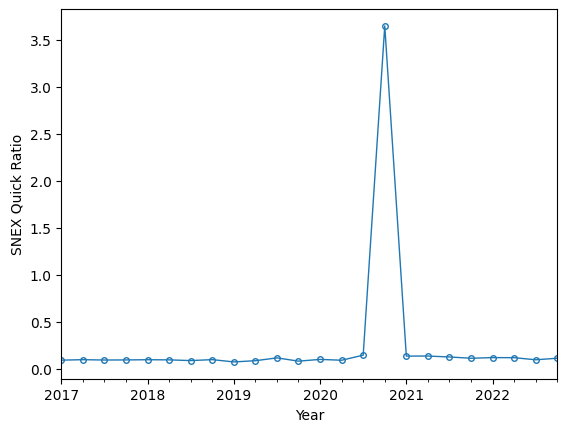

In [11]:
# Plot SNEX Quick Ratio time series chart
test_fa_data['quick_ratio'].plot(
    marker="o",
    markersize=4,
    markerfacecolor="none",
    linestyle="-",
    linewidth=1,
    xlabel="Year",
    ylabel="SNEX Quick Ratio",
)
plt.show()

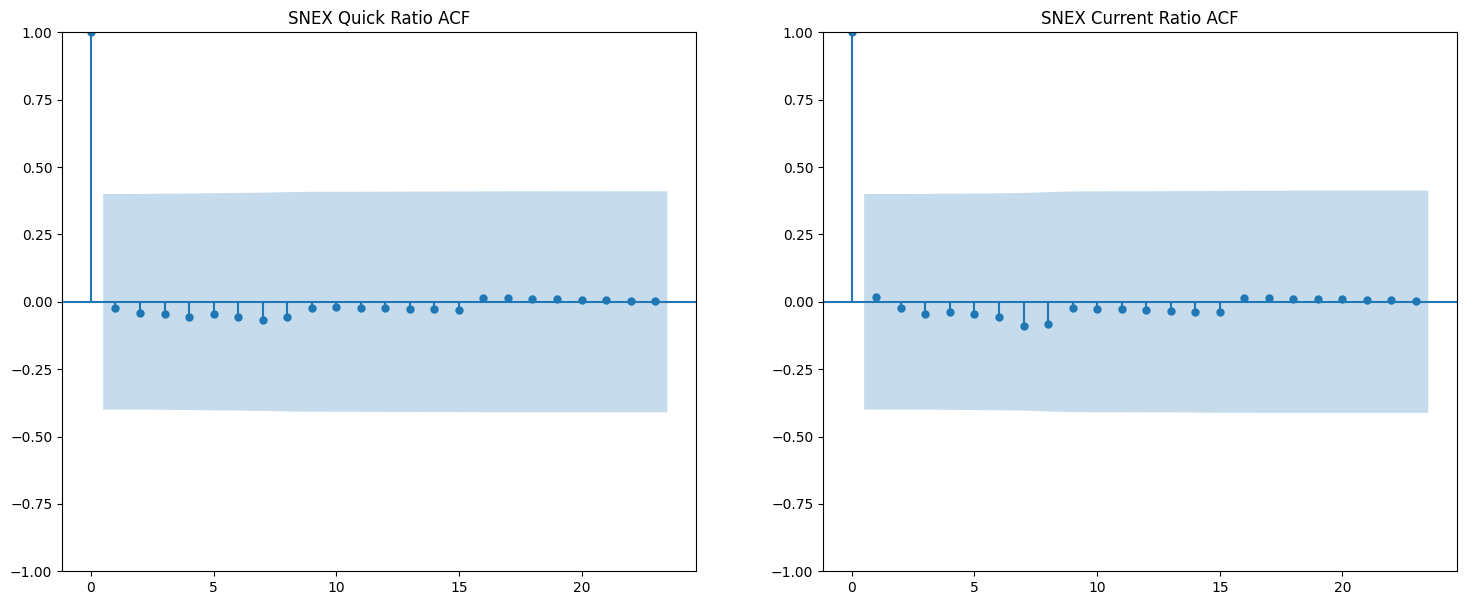

In [12]:
# ACF Plots for SNEX's Quick Ratio and Current Ratio
fig, ax = plt.subplots(1, 2, figsize=(18, 7))
sm.graphics.tsa.plot_acf(test_fa_data['quick_ratio'],
                         title="SNEX Quick Ratio ACF",
                         lags=23,
                         ax=ax[0])
sm.graphics.tsa.plot_acf(
    test_fa_data['current_ratio'],
    title="SNEX Current Ratio ACF",
    lags=23,
    ax=ax[1]
)

plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


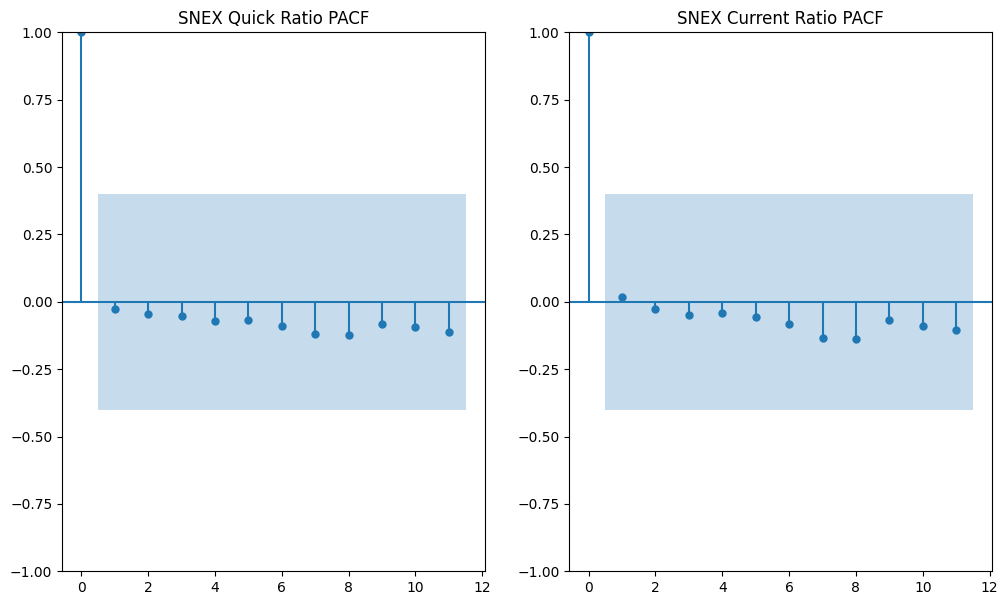

In [13]:
# PACF plots for SNEX's Quick Ratio and Current Ratio
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sm.graphics.tsa.plot_pacf(test_fa_data['quick_ratio'],
                         title="SNEX Quick Ratio PACF",
                         lags=11,
                         ax=ax[0])
sm.graphics.tsa.plot_pacf(
    test_fa_data['current_ratio'],
    title="SNEX Current Ratio PACF",
    lags=11,
    ax=ax[1]
)

plt.show()

With the plots above we can come to the conclusion that an ARMA(1,1) model is suitable for this data.
Since "quick_ratio" variable is derived from the ratio of "cashAndCashEquivalents" and "totalCurrentLiabilities", it contains information from both of the variables, so they can be droped. This is why only the variable: "quic_ratio" can be used for additional data experimentation with time further series analysis and forecasting by ARMA models.

## Unit Root Testing

### Demonstration

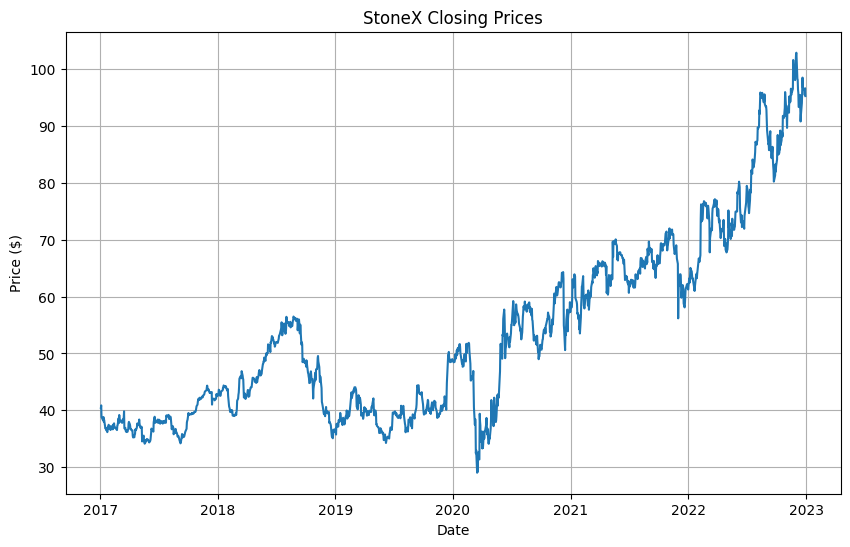

ADF Statistic: -0.3148789236861879
p-value: 0.923


In [14]:
# Get data for this ticker
tickerData = yf.Ticker(ticker)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2017-01-01', end='2022-12-31')

# See your data
tickerDf

# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(tickerDf['Close'])
plt.title('StoneX Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

# Perform ADF test
result = adfuller(tickerDf['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {round(result[1],3)}')



p-value is greater than 0.05, then we conclude the data is non stationary, the process contains unit root

### Diagrams

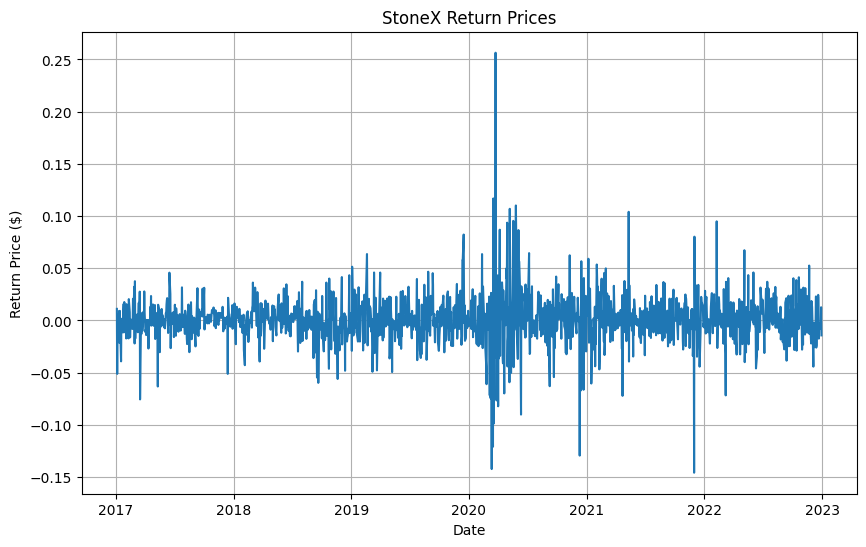

ADF Statistic (Return series): -10.324974800186709
p-value (Return series): 3e-18


In [15]:
# Apply log transformation
# tickerDf['LogClose'] = np.log(tickerDf['Close'])
tickerDf['Return'] = tickerDf['Close'].pct_change()

# Plot the return
plt.figure(figsize=(10, 6))
plt.plot(tickerDf['Return'])
plt.title('StoneX Return Prices')
plt.xlabel('Date')
plt.ylabel('Return Price ($)')
plt.grid(True)
plt.show()

# Perform ADF test on log-transformed series
result = adfuller(tickerDf['Return'].dropna())
print(f'ADF Statistic (Return series): {result[0]}')
print(f'p-value (Return series): {round(result[1],18)}')



## Feature Extraction

### Demonstration

In [16]:
test_fa_data.columns

Index(['totalCurrentAssets', 'totalCurrentLiabilities',
       'cashAndCashEquivalents', 'current_ratio', 'quick_ratio'],
      dtype='object', name='lineitem')

In [17]:
#from sklearn.linear_model import Lasso
#from sklearn.preprocessing import StandardScaler

# Load the data
data = test_fa_data
X = data[['totalCurrentAssets',
          'totalCurrentLiabilities',
          'cashAndCashEquivalents',
          'current_ratio']]

y = data['quick_ratio']

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create a lasso regression object
lasso = Lasso(alpha=0.1)

# Fit the model
lasso.fit(X_std, y)

# Display the coefficients
print(lasso.coef_)

[-0.         -0.          0.          0.60748044]


In [18]:
# looking for the most important feature

names = X.columns

print(np.sum(lasso.coef_ != 0))

print([names[i] for i in range(len(names)) if lasso.coef_[i] != 0])

1
['current_ratio']


### Diagrams

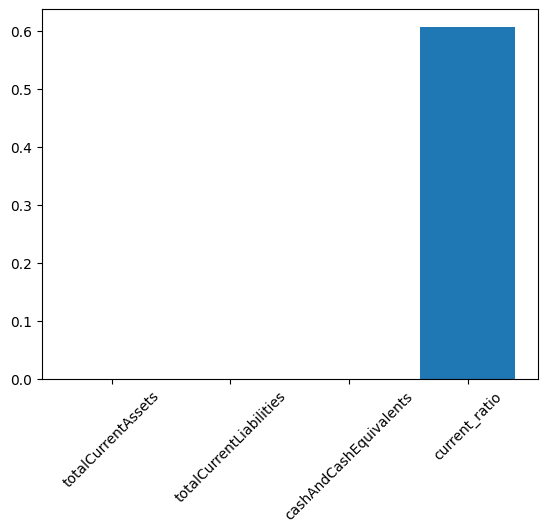

In [19]:
# visualizing the feature importance by Lasso regression and thus feature extraction
plt.bar(test_fa_data.columns.drop('quick_ratio'), lasso.coef_)
plt.xticks(rotation=45)
plt.show()